This (article] [http://pbpython.com/simple-graphing-pandas.html] will walk through how to start doing some simple graphing in pandas.
I am using a new data file that is the same format as my previous article but includes data for only 20 customers.
First we are going to import pandas, numpy and matplot lib. 
I am also showing the versions I'm testing so you can make sure yours is compatible.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'0.24.2'

Next, enable iPython to display matplotlib graphs. As an alternative you can run ipython notebook.

In [9]:
%matplotlib inline

We will read in the file like we did in the previous article but I'm going to tell it to treat the date column as a date field so I can do some re-sampling later.

In [64]:
sales=pd.read_csv("../data/sample-sales-tax.csv", parse_dates=['date'])
sales.head(10)

,account number,name,sku,category,quantity,unit price,ext price,Tax rate,Tax amount,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,0.070,40.47680,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,0.070,71.31460,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,0.070,20.29440,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,0.070,28.93800,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,0.070,125.54640,2014-01-03 08:14:27
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,0.070,62.85580,2013-12-04 02:07:05
6,995267,Cole-Eichmann,GS-86623,Shoes,18,15.28,275.04,0.070,19.25280,2014-04-09 16:15:03
7,524021,Hegmann and Sons,LL-46261,Shoes,7,78.78,551.46,0.070,38.60220,2014-06-18 19:25:10
8,929400,"Senger, Upton and Breitenberg",LW-86841,Shoes,17,38.19,649.23,0.015,9.73845,2014-02-10 05:55:56
9,563905,"Kerluke, Reilly and Bechtelar",KV-99194,Shirt,12,26.98,323.76,0.015,4.85640,2014-05-20 00:21:28


In [65]:
sales.shape

(1000, 10)

Now that we have read in the data, we can do some quick analysis

In [66]:
sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account number,1000.0,535208.897000,277589.746014,93356.00000,299771.000000,563905.0000,750461.000000,995267.00
quantity,1000.0,10.328000,5.687597,1.00000,5.750000,10.0000,15.000000,20.00
unit price,1000.0,56.179630,25.331939,10.06000,35.995000,56.7650,76.802500,99.97
ext price,1000.0,579.843900,435.303810,10.38000,232.605000,471.7200,878.137500,1994.80
Tax rate,1000.0,0.035863,0.025598,0.00300,0.015000,0.0300,0.040000,0.15
Tax amount,1000.0,20.058881,22.463583,0.20205,5.327175,13.1698,26.302725,191.25


We can actually learn some pretty helpful info from this simple command:
For example, we can tell that customers on average purchases 10.3 items per transaction and that the average cost of the transaction was $579.84. It is also easy to see the min and max so you understand the range of the data.

In [68]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

It is easy to call describe on a single column too. I can see that my average price is \$56.18 but it ranges from \$10.06 to \$99.97.

I am showing the output of dtypes so that you can see that the date column is a datetime field. I also scan this to make sure that any columns that have numbers are floats or ints so that I can do additional analysis in the future.

In [69]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
Tax rate                 float64
Tax amount               float64
date              datetime64[ns]
dtype: object

Now we remove some columns to make additional analysis easier.

In [71]:
customers = sales[['name','ext price','date']]
customers.head()

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
3,Waters-Walker,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:27


This representation has multiple lines for each customer. In order to understand purchasing patterns, let's group all the customers by name.

In [72]:
customer_group = customers.groupby('name')
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

In [74]:
count_name = sales[sales.name == 'Berge LLC'].name.count()
count_name

52

Now that our data is in a simple format to manipulate, let's determine how much each customer purchased during our time frame.

The sum function allows us to quickly sum up all the values by customer. We can also sort the data using the sort command.

In [75]:
sales_totals = customer_group.sum()
sales_totals.sort_values(by=['ext price']).head()

,ext price
name,
"Davis, Kshlerin and Reilly",19054.76
Huel-Haag,21087.88
Gorczany-Hahn,22207.90
Hamill-Hackett,23433.78
Heidenreich-Bosco,25428.29


Now that we know what the data look like, tt is very simple to create a quick bar chart plot.

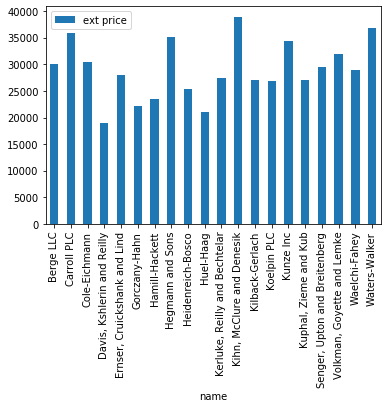

In [76]:
my_plot = sales_totals.plot(kind='bar')

Unfortunately this chart is a little ugly. With a few tweaks we can make it a little more impactful.
Let's try:
- sorting the data in descending order.
- Removing the legend
- Adding a title
- Labeling the axes

Text(0, 0.5, 'Sales ($)')

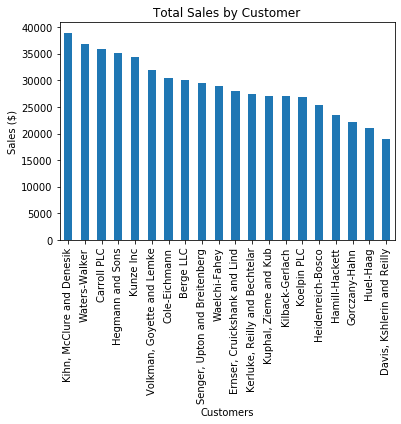

In [77]:
my_plot = sales_totals.sort_values(by=['ext price'],ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

This actually tells us a little about our biggest customers and how much difference there is between their sales and our smallest customers.

Now, let's try to see how the sales break down by category.

In [81]:
customers = sales[['name', 'category', 'ext price','date']]
customers.head()

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:24
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:27


We can use groupby to organize the data by category and name.

In [84]:
category_group=customers.groupby(['name','category']).sum()
category_group

ext price
name                          category           
Berge LLC                     Belt        6033.53
                              Shirt       9670.24
                              Shoes      14361.10
Carroll PLC                   Belt        9359.26
                              Shirt      13717.61
                              Shoes      12857.44
Cole-Eichmann                 Belt        8112.70
                              Shirt      14528.01
                              Shoes       7794.71
Davis, Kshlerin and Reilly    Belt        1604.13
                              Shirt       7533.03
                              Shoes       9917.60
Ernser, Cruickshank and Lind  Belt        5894.38
                              Shirt      16944.19
                              Shoes       5250.45
Gorczany-Hahn                 Belt        3642.48
                              Shirt      12576.83
                              Shoes       5988.59
Hamill-Hackett                Belt        1609.74
                              Shirt       8880.04
                              Shoes      12944.00
Hegmann and Sons              Belt        4909.38
                              Shirt      16774.47
                              Shoes      13529.87
Heidenreich-Bosco             Belt        6262.94
                              Shirt       5965.25
                              Shoes      13200.10
Huel-Haag                     Belt        2219.51
                              Shirt      11944.01
                              Shoes       6924.36
Kerluke, Reilly and Bechtelar Belt        4102.11
                              Shirt      12958.23
                              Shoes      10329.09
Kihn, McClure and Denesik     Belt       10116.90
                              Shirt      18956.35
                              Shoes       9862.04
Kilback-Gerlach               Belt        2863.40
                              Shirt       9904.85
                              Shoes      14218.95
Koelpin PLC                   Belt        5327.96
                              Shirt       7908.28
                              Shoes      13575.42
Kunze Inc                     Belt        4264.59
                              Shirt      15638.87
                              Shoes      14503.08
Kuphal, Zieme and Kub         Belt        2009.69
                              Shirt      12101.14
                              Shoes      12921.03
Senger, Upton and Breitenberg Belt        9509.88
                              Shirt       7659.70
                              Shoes      12407.88
Volkman, Goyette and Lemke    Belt        4429.01
                              Shirt      12791.27
                              Shoes      14786.59
Waelchi-Fahey                 Belt        8285.72
                              Shirt      11689.05
                              Shoes       8993.91
Waters-Walker                 Belt        5957.24
                              Shirt      18633.71
                              Shoes      12188.01

The category representation looks good but we need to break it apart to graph it as a stacked bar graph. Unstack can do this for us.

In [86]:
category_group.unstack()

ext price                    
category                           Belt     Shirt     Shoes
name                                                       
Berge LLC                       6033.53   9670.24  14361.10
Carroll PLC                     9359.26  13717.61  12857.44
Cole-Eichmann                   8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly      1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind    5894.38  16944.19   5250.45
Gorczany-Hahn                   3642.48  12576.83   5988.59
Hamill-Hackett                  1609.74   8880.04  12944.00
Hegmann and Sons                4909.38  16774.47  13529.87
Heidenreich-Bosco               6262.94   5965.25  13200.10
Huel-Haag                       2219.51  11944.01   6924.36
Kerluke, Reilly and Bechtelar   4102.11  12958.23  10329.09
Kihn, McClure and Denesik      10116.90  18956.35   9862.04
Kilback-Gerlach                 2863.40   9904.85  14218.95
Koelpin PLC                     5327.96   7908.28  13575.42
Kunze Inc                       4264.59  15638.87  14503.08
Kuphal, Zieme and Kub           2009.69  12101.14  12921.03
Senger, Upton and Breitenberg   9509.88   7659.70  12407.88
Volkman, Goyette and Lemke      4429.01  12791.27  14786.59
Waelchi-Fahey                   8285.72  11689.05   8993.91
Waters-Walker                   5957.24  18633.71  12188.01

Now plot it.

Text(0, 0.5, 'Sales')

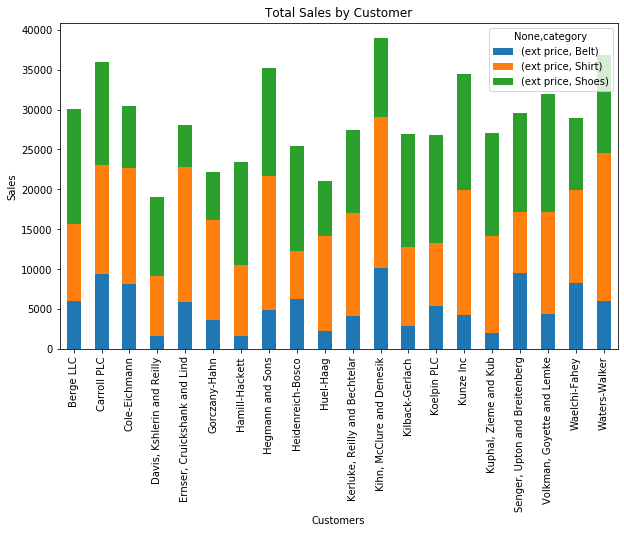

In [204]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer", figsize=(10,6))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")

Now clean some of this up a little bit.
We can specify the figure size and customize the legend.

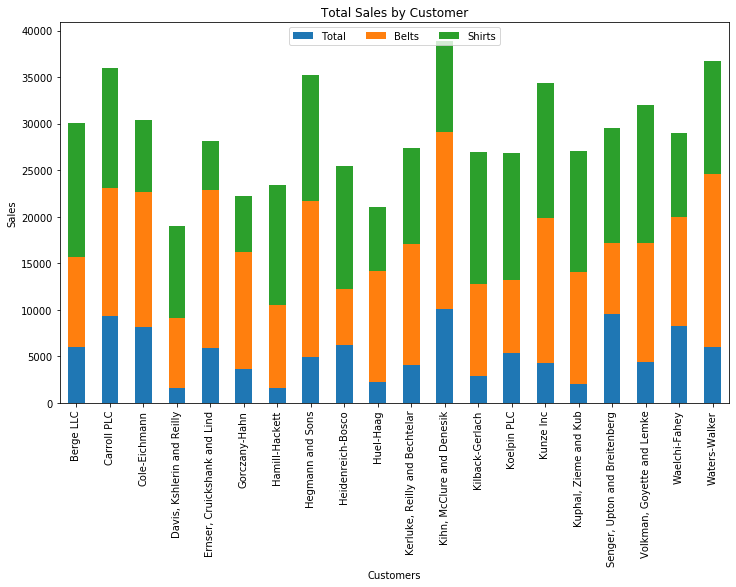

In [207]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(12, 7))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)

In [209]:
total_sale = my_plot.get_figure()
total_sale.savefig("../images/sample_graphic/total_sale_by_customers.png")

Now that we know who the biggest customers are and how they purchase products, we might want to look at purchase patterns in more detail.

Let's take another look at the data and try to see how large the individual purchases are. A histogram allows us to group purchases together so we can see how big the customer transactions are.

In [182]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


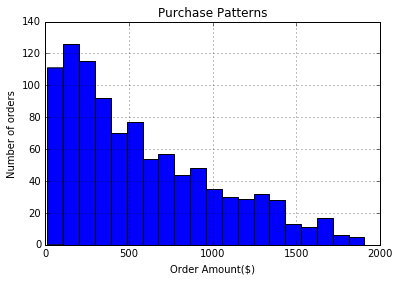

In [18]:
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

After looking at this group

We can look at purchase patterns over time. We can see that most of our transactions are less than $500 and only a very few are about $1500.

Another interesting way to look at the data would be by sales over time. Do we have certain months where we are busier than others?

Let's get the data down to order size and date.

In [278]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


If we want to analyze the data by date, we need to set the date column as the index.

In [279]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

,ext price
date,
2014-09-27 07:13:03,578.24
2014-07-29 02:10:44,1018.78
2014-03-01 10:51:24,289.92
2013-11-17 20:41:11,413.40
2014-01-03 08:14:27,1793.52


One of the really cool things that pandas allows us to do is resample the data. If we want to look at the data by month, we can easily resample and sum it all up.

purchase_patterns.resample('M',how=sum)

Plotting the data is now very easy

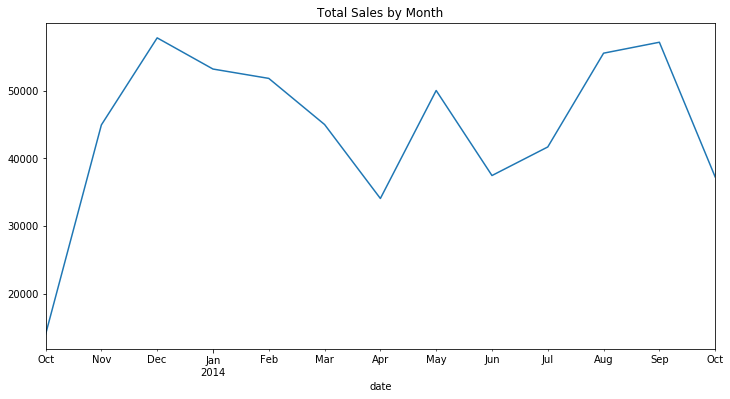

In [284]:
purchase_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month", figsize = (12, 6), legend=None)

December is our peak month and April is the slowest.

Let's say we really like this plot and want to save it somewhere for a presentation.

In [201]:
fig = purchase_plot.get_figure()
fig.savefig("../images/sample_graphic/total-sales.png")

Queries category

In [230]:
cat_by_qty = sales[['category', 'quantity']].groupby(['category']).sum()
cat_by_qty

,quantity
category,
Belt,2020
Shirt,4254
Shoes,4054


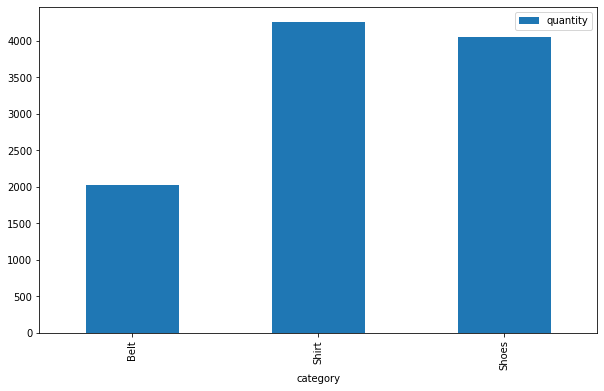

In [233]:
cat_plot = cat_by_qty.plot(kind = 'bar', figsize = (10, 6))

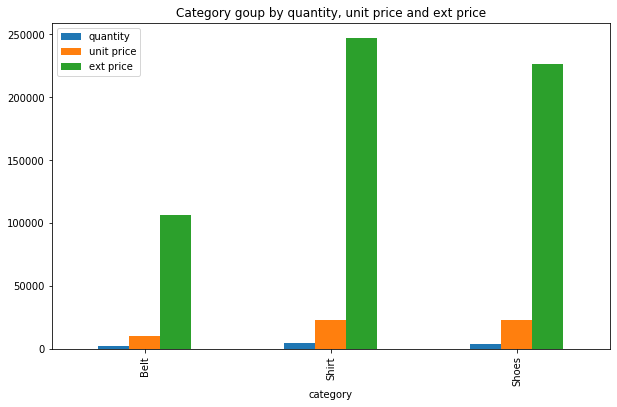

In [239]:
cat_group = sales[['category', 'quantity', 'unit price', 'ext price']].groupby(['category']).sum()
cat_group_plot = cat_group.plot.bar(figsize = (10, 6), title = 'Category goup by quantity, unit price and ext price')

#### Tax rate

In [242]:
## Total tax
total_tax = sales['Tax amount'].sum()
total_tax

20058.880780000003

In [257]:
## Tax rate
tax_rate = sales[['Tax rate', 'category', 'quantity']].groupby(['Tax rate', 'category']).sum()
tax_rate

quantity
Tax rate category          
0.003    Belt            35
         Shirt           82
         Shoes           75
0.011    Belt           105
         Shirt          250
         Shoes          201
0.015    Belt           585
         Shirt         1082
         Shoes          934
0.025    Belt           217
         Shirt          418
         Shoes          434
0.030    Belt           664
         Shirt         1355
         Shoes         1405
0.070    Belt           178
         Shirt          638
         Shoes          441
0.075    Belt           221
         Shirt          383
         Shoes          505
0.150    Belt            15
         Shirt           46
         Shoes           59

In [258]:
tax_rate_by_amount = sales[['Tax rate', 'Tax amount']].groupby(['Tax rate']).sum()
tax_rate_by_amount

,Tax amount
Tax rate,
0.003,36.62691
0.011,324.63222
0.015,2211.53820
0.025,1646.97550
0.030,5758.06950
0.070,4676.75670
0.075,4504.95075
0.150,899.33100


In [260]:
# Unit price
sales['unit price'].sum()

56179.63

In [268]:
# Ext price
ext = sales['ext price'].sum()
ext

579843.9000000001

In [269]:
# Tax Aount
amount = sales['Tax amount'].sum()
amount

20058.880780000003

In [271]:
# Profit
profit = ext - amount
profit

559785.0192200001

In [308]:
year = sales[(sales.name == 'Carroll PLC')& (sales.sku == 'QN-82852')].date.dt.month
year

0      9
192    8
228    7
256    4
Name: date, dtype: int64

In [336]:
profit_by_date = sales[['quantity', 'unit price', 'ext price', 'Tax amount']].groupby([sales.date.dt.year, sales.date.dt.month]).sum()
profit_by_date

quantity  unit price  ext price  Tax amount
date date                                             
2013 10         254     1548.63   14085.27   421.79586
     11         777     4769.77   44932.78  1486.62848
     12        1086     5668.96   57752.23  2123.45229
2014 1          972     5179.50   53161.35  1850.57939
     2          922     4660.86   51783.56  2063.79859
     3          870     4575.74   44991.85  1632.08918
     4          650     3753.34   34098.05  1260.86326
     5          908     4551.16   50001.02  1412.40316
     6          644     3764.61   37477.65  1280.29682
     7          733     3599.31   41686.71  1483.96844
     8          877     5348.67   55497.09  1869.64523
     9         1033     5361.93   57107.51  1950.63560
     10         602     3397.15   37268.83  1222.72448

In [348]:
# Best customer
sales[['name', 'ext price']].groupby(['name']).sum().sort_values(['ext price'], ascending=False).head()

,ext price
name,
"Kihn, McClure and Denesik",38935.29
Waters-Walker,36778.96
Carroll PLC,35934.31
Hegmann and Sons,35213.72
Kunze Inc,34406.54
